# Data Abstrak PTA 

## Data Abstrak PTA
Data Abstrak PTA merupakan sebuah dataset yang diambil dari data di pta.trunojoyo.ac.id dan merupakan hasil abstrak tugas akhir para mahasiswa di Universitas Trunojoyo Madura. Data Abstrak PTA di Crawling menggunakan scrapy dan dilakukan beberapa Preprocessing untuk mendapatkan hasil dataset yang lebih baik untuk dilakukan Clustering. Berikut beberapa tahapan yang dilakukan dengan menggunakan data abstrak PTA.

## Crawling Data


### Penginstalan Scrapy
Yang pertama ialah menginstal modul scrapy pada python.

In [ ]:
!pip install scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 5.1 MB/s 
     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 4.0 MB 45.3 MB/s 
     |████████████████████████████████| 3.1 MB 34.6 MB/s 
     |████████████████████████████████| 261 kB 44.9 MB/s 
     |████████████████████████████████| 57 kB 2.0 MB/s 
     |████████████████████████████████| 74 kB 2.3 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11959 sha256=e838caae181440745e0d637fd2088c509803eae6ab1c0605cf0faa65e9cc6b44
  Stored in directory: /root/.cache/pip/wheels/dc/b9/4a/948b1176e084b9e3f85e4ffc3d08f817b1fdf0d973bbb94f81
Successfully built PyDispatcher


### Membuat File
Selanjutnya, membuat file dengan diberi nama firstproject

In [ ]:
#Membuat file 
!scrapy startproject firstproject

New Scrapy project 'firstproject', using template directory '/usr/local/lib/python3.8/dist-packages/scrapy/templates/project', created in:
    /content/firstproject

You can start your first spider with:
    cd firstproject
    scrapy genspider example example.com


### Penempatan Direktori
Memastikan direktori yang akan digunakan tepat

In [ ]:
# get the current working directory
import os
os.getcwd()

'/content'

In [ ]:
# change working directories
os.chdir('/content/firstproject/firstproject/spiders')
os.getcwd()

'/content/firstproject/firstproject/spiders'

### Membuat File Python
Membuat file python dengan nama quotes_spider.py dan disimpan di direktori firstproject/firstproject/spiders directory <br>

Dalam code, menyimapan nilai sebesar 100000, dan link yang digunakan ada 2. Jadi, data abstrak yang bisa didapatkan dari angkatan 2007 dan 2004 ditandai di link dengan awalan 04 dan 07. Dan melakukan perulangan sebanyak 300 sehingga nilai x bertambah menjadi 100001, hingga 300. 

In [ ]:
# create quotes_spider.py and save it under the firstproject/firstproject/spiders directory
%%writefile -a quotes_spider.py
import scrapy

class QuotesSpider(scrapy.Spider):
    name = "quotes"

    def start_requests(self):
        x = 100000
        for i in range (1,300):
            x +=1
            urls = [
                'https://pta.trunojoyo.ac.id/welcome/detail/070411'+str(x),
                'https://pta.trunojoyo.ac.id/welcome/detail/040411'+str(x),
            ]
            for url in urls:
                yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
      yield{
            'Abstrak':response.css('#content_journal > ul > li > div:nth-child(4) > div:nth-child(2) > p::text').extract()
        }

Writing quotes_spider.py


### Melakukan Crawling
Selanjutnya, file python yang diatas di run dan melakukan tahapan crawling

In [ ]:
!scrapy crawl quotes

2022-12-14 05:06:37 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: firstproject)
2022-12-14 05:06:37 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.8.16 (default, Dec  7 2022, 01:12:13) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.7 1 Nov 2022), cryptography 38.0.4, Platform Linux-5.10.133+-x86_64-with-glibc2.27
2022-12-14 05:06:37 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'firstproject',
 'NEWSPIDER_MODULE': 'firstproject.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_MODULES': ['firstproject.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'}
2022-12-14 05:06:37 [asyncio] DEBUG: Using selector: EpollSelector
2022-12-14 05:06:37 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2022-12-14 05:06:37 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyn

### Menyimpan Data
Simpan data hasil crawling kedalam bentuk csv dengan nama data_awal_crawling.csv

In [ ]:
#Menyimpan Data dalam Bentuk CSV
!scrapy runspider quotes_spider.py -o data_awal_crawling.csv

2022-12-14 05:08:39 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: firstproject)
2022-12-14 05:08:39 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.8.16 (default, Dec  7 2022, 01:12:13) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.7 1 Nov 2022), cryptography 38.0.4, Platform Linux-5.10.133+-x86_64-with-glibc2.27
2022-12-14 05:08:39 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'firstproject',
 'NEWSPIDER_MODULE': 'firstproject.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_LOADER_WARN_ONLY': True,
 'SPIDER_MODULES': ['firstproject.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'}
2022-12-14 05:08:39 [asyncio] DEBUG: Using selector: EpollSelector
2022-12-14 05:08:39 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2022-12-14 05:08:39 [scrapy.utils.log] DEB

### Menampilkan Data 
Menampilkan data hasil crawling dengan menggunakan modul pandas.

In [ ]:
import pandas as pd 
df=pd.read_csv('data_awal_crawling.csv')

In [ ]:
df

,Abstrak
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
593,NaN
594,NaN
595,NaN
596,NaN


### Membuang Data Kosong
Data yang berisi nilai NaN atau kosong, akan dihapus dan akan mendapatkan nilai dataset yang baru.

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Abstrak    0
dtype: int64

Data hasil drop NaN yang baru disimpan dengan nama hasil_crawling.csv

In [ ]:
df.to_csv("hasil_crawling.csv")

In [ ]:
data_hasil=pd.read_csv("https://raw.githubusercontent.com/MohSyarif190005/fileReadme/main/hasil_crawling.csv")

In [ ]:
data_hasil

,Unnamed: 0,Abstrak
0,12,Gerak pekerja ada pada game yang memiliki genr...
1,16,Senyum merupakan salah satu fitur biometrik ya...
2,32,Segmentasi adalah suatu proses untuk mengekstr...
3,36,Kabupaten Bangkalan Mempunyai jumlah penduduk ...
4,44,ABSTRAK\r\nPerkembangan teknologi masa kini te...
...,...,...
59,336,Search engine saat ini menggunakan mekanisme t...
60,338,Malaria disebabkan oleh intraseluler parasit b...
61,350,Peramalan memperkirakan sesuatu pada waktu-wak...
62,353,Pengiriman informasi melalui jaringan elektron...


## Text Processing
NLP dengan Python dengan menggunakan Sastrawi <br>
Library NLTK dan Sastrawi ini akan digunakan untuk melakukan analisis terhadap dokumen yang dimiliki. Dalam prosesnya kita akan mengenal aspek dalam NLP (Natural Language Processing) yaitu tokenization dan stopwords.

### NLTK
NLTK adalah singkatan dari Natural Language Tool Kit, yaitu sebuah library yang digunakan untuk membantu kita dalam bekerja dengan teks. Library ini memudahkan kita untuk memproses teks seperti melakukan classification, tokenization, stemming, tagging, parsing, dan semantic reasoning.

Sebelum dapat menggunakan NLTK, melakukan instalisasi terlebih dahulu

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Menginstal semua library yang sekiranya nanti dibutuhkan

In [ ]:
!python -m nltk.downloader popular

/usr/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_da

### Sastrawi
Salah satu kekurangan dari NLTK adalah dukungannya terhadap bahasa Indonesia yang masih kurang, oleh karenanya kita akan menggunakan library tambahan berupa Sastrawi. Sastrawi adalah library NLP yang dikhususkan untuk bahasa Indonesia. Awal mulanya sastrawi dikembangkan dan diperuntukan untuk bahasa pemograman PHP, akan tetapi karena popularitasnya selanjutnya library ini dikembangkan juga agar mendukung bahasa pemograman Python.

Lakukan Instalisasi terhadap Sastrawi

In [ ]:
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 5.2 MB/s 


In [ ]:
#load dataset
data=pd.read_csv('https://raw.githubusercontent.com/MohSyarif190005/fileReadme/main/hasil_crawling.csv')
data

,Unnamed: 0,Abstrak
0,12,Gerak pekerja ada pada game yang memiliki genr...
1,16,Senyum merupakan salah satu fitur biometrik ya...
2,32,Segmentasi adalah suatu proses untuk mengekstr...
3,36,Kabupaten Bangkalan Mempunyai jumlah penduduk ...
4,44,ABSTRAK\r\nPerkembangan teknologi masa kini te...
...,...,...
59,336,Search engine saat ini menggunakan mekanisme t...
60,338,Malaria disebabkan oleh intraseluler parasit b...
61,350,Peramalan memperkirakan sesuatu pada waktu-wak...
62,353,Pengiriman informasi melalui jaringan elektron...


In [ ]:
data.head()

,Unnamed: 0,Abstrak
0,12,Gerak pekerja ada pada game yang memiliki genr...
1,16,Senyum merupakan salah satu fitur biometrik ya...
2,32,Segmentasi adalah suatu proses untuk mengekstr...
3,36,Kabupaten Bangkalan Mempunyai jumlah penduduk ...
4,44,ABSTRAK\r\nPerkembangan teknologi masa kini te...


Drop data Bagian NaN

In [ ]:
data.drop(['Unnamed: 0'] ,axis=1,inplace=True)
data

,Abstrak
0,Gerak pekerja ada pada game yang memiliki genr...
1,Senyum merupakan salah satu fitur biometrik ya...
2,Segmentasi adalah suatu proses untuk mengekstr...
3,Kabupaten Bangkalan Mempunyai jumlah penduduk ...
4,ABSTRAK\r\nPerkembangan teknologi masa kini te...
...,...
59,Search engine saat ini menggunakan mekanisme t...
60,Malaria disebabkan oleh intraseluler parasit b...
61,Peramalan memperkirakan sesuatu pada waktu-wak...
62,Pengiriman informasi melalui jaringan elektron...


In [ ]:
data.to_csv('data_baru.csv')

Karena di module stopwords.words stopword yang tersedia hanya terbatas, maka kata-kata yang sekiranya tidak penting dan tidak bermakna yang tidak terdapat dalam module stopwords.words maka bisa kita tambahkan sendiri. Untuk mengecek stopword apa saja yang tersedia di dalam module stopwords.words maka kalian bisa ketikkan syntax seperti berikut:

### Membersihkan Data Abstrak
<li>Mengganti semua ke lowercase
<li> Membuang Urls
<li> Membuang mentions
<li> Membuang Placeholder (Seperti foto dan video)
<li> Membuang Tanda Baca (Tidak Terkait dengan emoji)

In [ ]:
#load dataset
data_pre=pd.read_csv('https://raw.githubusercontent.com/MohSyarif190005/fileReadme/main/data_baru.csv')
data_pre


,Unnamed: 0,Abstrak
0,0,Gerak pekerja ada pada game yang memiliki genr...
1,1,Senyum merupakan salah satu fitur biometrik ya...
2,2,Segmentasi adalah suatu proses untuk mengekstr...
3,3,Kabupaten Bangkalan Mempunyai jumlah penduduk ...
4,4,ABSTRAK\r\nPerkembangan teknologi masa kini te...
...,...,...
59,59,Search engine saat ini menggunakan mekanisme t...
60,60,Malaria disebabkan oleh intraseluler parasit b...
61,61,Peramalan memperkirakan sesuatu pada waktu-wak...
62,62,Pengiriman informasi melalui jaringan elektron...


In [ ]:
!pip install Sastrawi
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import some libraries
import pandas as pd
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Cleaning Text
1. Fungsi cleaningText, menghapus mention, menghapus hashtag, menghapus RT, menghapus link, dan menghapus nomor, mengganti baris baru dengan spasi, menghapus semua tanda baca, dan menghapus berbagai macam karakter atau emoji teks dari kiri ke kanan. <br>

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    #text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

#### Case Folding Text

2. Fungsi caseFoldingText, mengubah semua huruf menjadi huruf kecil (lowercase) semua. Sementara itu, karakter lain yang bukan termasuk huruf dan angka, seperti tanda baca dan spasi dianggap sebagai delimiter. Delimiter ini bisa juga dihapus atau diabaikan dengan menggunakan perintah yang ada di Python.<br>

In [ ]:
def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

#### Tokenizing Text
3. Fungsi tokenizingText, pemisahan string pada teks menjadi beberapa daftar token sehingga dapat digunakan untuk menganalisa teks <br>

In [ ]:
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

#### Filtering Text
4. Fungsi filteringText, tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).


In [ ]:
def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

#### Stemming Text
5. Fungsi stemmingText, proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word).

In [ ]:
def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

#### to Sentence
6. Fungsi toSentence, Ubah daftar kata menjadi kalimat


In [ ]:
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
data_pre['text_clean'] = data_pre['Abstrak'].apply(cleaningText)
data_pre['text_clean'] = data_pre['text_clean'].apply(casefoldingText)
data_pre.drop(['Abstrak'], axis = 1, inplace = True)

data_pre['text_preprocessed'] = data_pre['text_clean'].apply(tokenizingText)
data_pre['text_preprocessed'] = data_pre['text_preprocessed'].apply(filteringText)
data_pre['text_preprocessed'] = data_pre['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
data_pre.drop_duplicates(subset = 'text_clean', inplace = True)


In [ ]:
# Export to csv file
data_pre.to_csv(r'data_clean.csv', index = False, header = True,index_label=None)

In [ ]:
#Load Dataset
data_clean=pd.read_csv('data_clean.csv')
data_clean

,Unnamed: 0,text_clean,text_preprocessed
0,0,gerak pekerja ada pada game yang memiliki genr...,"['gerak', 'kerja', 'game', 'milik', 'genre', '..."
1,1,senyum merupakan salah satu fitur biometrik ya...,"['senyum', 'salah', 'fitur', 'biometrik', 'jad..."
2,2,segmentasi adalah suatu proses untuk mengekstr...,"['segmentasi', 'proses', 'ekstraksi', 'tampil'..."
3,3,kabupaten bangkalan mempunyai jumlah penduduk ...,"['kabupaten', 'bangkal', 'duduk', '', 'ikut', ..."
4,4,abstrak\r perkembangan teknologi masa kini tel...,"['abstrak', 'kembang', 'teknologi', 'manusia',..."
...,...,...,...
59,59,search engine saat ini menggunakan mekanisme t...,"['search', 'engine', 'mekanisme', 'temu', 'inf..."
60,60,malaria disebabkan oleh intraseluler parasit b...,"['malaria', 'sebab', 'intraseluler', 'parasit'..."
61,61,peramalan memperkirakan sesuatu pada waktu-wak...,"['amal', 'waktu', 'dasar', 'data', 'lampau', '..."
62,62,pengiriman informasi melalui jaringan elektron...,"['kirim', 'informasi', 'jaring', 'elektronik',..."


## Term Frequency (TF)
Term Frequency — Inverse Document Frequency atau TF — IDF adalah suatu metode algoritma yang berguna untuk menghitung bobot setiap kata yang umum digunakan. Metode ini juga terkenal efisien, mudah dan memiliki hasil yang akurat. Metode ini akan menghitung nilai Term Frequency (TF) dan Inverse Document Frequency (IDF) pada setiap token (kata) di setiap dokumen dalam korpus. Secara sederhana, metode TF-IDF digunakan untuk mengetahui berapa sering suatu kata muncul di dalam dokumen.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
# get bag of words features in sparse format
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(data_clean['text_preprocessed'])
z = vectorizer.get_feature_names()
count=pd.DataFrame(X.toarray(),columns=z)
count

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolute,abstract,abstrak,abu,accuracy,aclam,acu,ada,adaptif,adaptive,...,wisatawan,word,world,www,xna,yan,yayasan,yogyakarta,zucara,zungu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dalam code diatas, menghitung setiap kata yang ada pada tweets dan kata tersebut muncul pada data tweets berapa kali sehingga semua kata yang ada menjadi sebuah kolom

## Matriks VSM (Vector Space Model)
VSM merupakan sebuah pendekatan natural yang berbasis pada vektor dari setiap kata dalam suatu dimensi spasial. Dokumen dipandang sebagai sebuah vektor yang memiliki magnitude (jarak) dan direction (arah). Pada VSM, sebuah kata direpresentasikan dengan sebuah dimensi dari ruang vektor. Relevansi sebuah dokumen ke sebuah kueri didasarkan pada similaritas diantara vektor dokumen dan vektor kueri.

In [ ]:
matrik_vsm=X.toarray()
#print(matrik_vsm)
matrik_vsm.shape

(64, 1512)

mengitung baris dan kolom

In [ ]:
matrik_vsm[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(len(matrik_vsm[:,1]))
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[z])
dataTF

64


,absolute,abstract,abstrak,abu,accuracy,aclam,acu,ada,adaptif,adaptive,...,wisatawan,word,world,www,xna,yan,yayasan,yogyakarta,zucara,zungu
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataTF.to_csv('hasil_TF.csv')

## Clustering 
Clustering atau klasterisasi adalah metode pengelompokan data. Menurut Tan, 2006 clustering adalah sebuah proses untuk mengelompokan data ke dalam beberapa cluster atau kelompok sehingga data dalam satu cluster memiliki tingkat kemiripan yang maksimum dan data antar cluster memiliki kemiripan yang minimum. <br>

Clustering merupakan proses partisi satu set objek data ke dalam himpunan bagian yang disebut dengan cluster. Objek yang di dalam cluster memiliki kemiripan karakteristik antar satu sama lainnya dan berbeda dengan cluster yang lain. Partisi tidak dilakukan secara manual melainkan dengan suatu algoritma clustering. Oleh karena itu, clustering sangat berguna dan bisa menemukan group atau kelompokyang tidak dikenal dalam data. Clustering banyak digunakan dalam berbagai aplikasi seperti misalnya pada business inteligence, pengenalan pola citra, web search, bidang ilmu biologi, dan untuk keamanan (security). 

### K-Means Clustering 
Clustering atau klasterisasi adalah metode pengelompokan data. Menurut Tan, 2006 clustering adalah sebuah proses untuk mengelompokan data ke dalam beberapa cluster atau kelompok sehingga data dalam satu cluster memiliki tingkat kemiripan yang maksimum dan data antar cluster memiliki kemiripan yang minimum.

Clustering merupakan proses partisi satu set objek data ke dalam himpunan bagian yang disebut dengan cluster. Objek yang di dalam cluster memiliki kemiripan karakteristik antar satu sama lainnya dan berbeda dengan cluster yang lain. Partisi tidak dilakukan secara manual melainkan dengan suatu algoritma clustering. Oleh karena itu, clustering sangat berguna dan bisa menemukan group atau kelompokyang tidak dikenal dalam data. Clustering banyak digunakan dalam berbagai aplikasi seperti misalnya pada business inteligence, pengenalan pola citra, web search, bidang ilmu biologi, dan untuk keamanan (security). 

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans=kmeans.fit(dataTF)
prediksi=kmeans.predict(dataTF)
centroid=kmeans.cluster_centers_

centroid

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[0.        , 0.16666667, 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14285714, 0.        ,
        0.        ],
       [0.25      , 0.        , 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.11111111, ..., 0.        , 0.02777778,
        0.02777778]])

In [ ]:
df=pd.DataFrame(prediksi, columns = ['cluster'])
df 

,cluster
0,3
1,1
2,1
3,3
4,3
...,...
59,0
60,1
61,2
62,0


### Persebaran Plot K-Means Clustering

In [ ]:
#Importing required modules

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

#Load Data
data = pd.read_csv('hasil_TF.csv')
pca = PCA(2)

#Transform the data
df = pca.fit_transform(data)

df.shape

(64, 2)

In [ ]:
df

array([[-3.15371306e+01, -2.60413750e+00],
       [-3.06677453e+01,  4.28225261e+00],
       [-2.96755856e+01,  7.93822068e+00],
       [-2.85167917e+01, -8.12726186e-01],
       [-2.76908545e+01, -2.86080455e+00],
       [-2.65280456e+01, -2.45700571e+00],
       [-2.55988788e+01, -6.00158149e-01],
       [-2.48421795e+01,  4.75067741e+00],
       [-2.34835781e+01, -1.40612100e+00],
       [-2.27673850e+01,  1.49539212e+01],
       [-2.13955609e+01, -3.60462442e+00],
       [-2.03639443e+01, -1.39516233e+00],
       [-1.95172175e+01, -2.50670402e+00],
       [-1.84069026e+01, -6.67693186e-01],
       [-1.78891198e+01, -5.13413380e+00],
       [-1.67791753e+01, -2.87655478e+00],
       [-1.56430875e+01,  2.11728440e+00],
       [-1.49740305e+01, -8.54460378e+00],
       [-1.38781724e+01, -6.30248060e+00],
       [-1.27407258e+01, -1.36298149e+00],
       [-1.14192568e+01, -8.96317130e-01],
       [-1.07046474e+01, -4.02797940e+00],
       [-9.53795330e+00,  1.10876262e+01],
       [-8.

In [ ]:
#Import required module
from sklearn.cluster import KMeans

nilai_cluster=4

#Initialize the class object
kmeans = KMeans(n_clusters= nilai_cluster)

#predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label)

Masukkan Nilai Kluster : 4
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


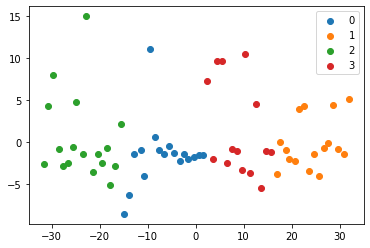

In [ ]:
#Getting unique labels
from matplotlib import pyplot as plt

u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()